   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


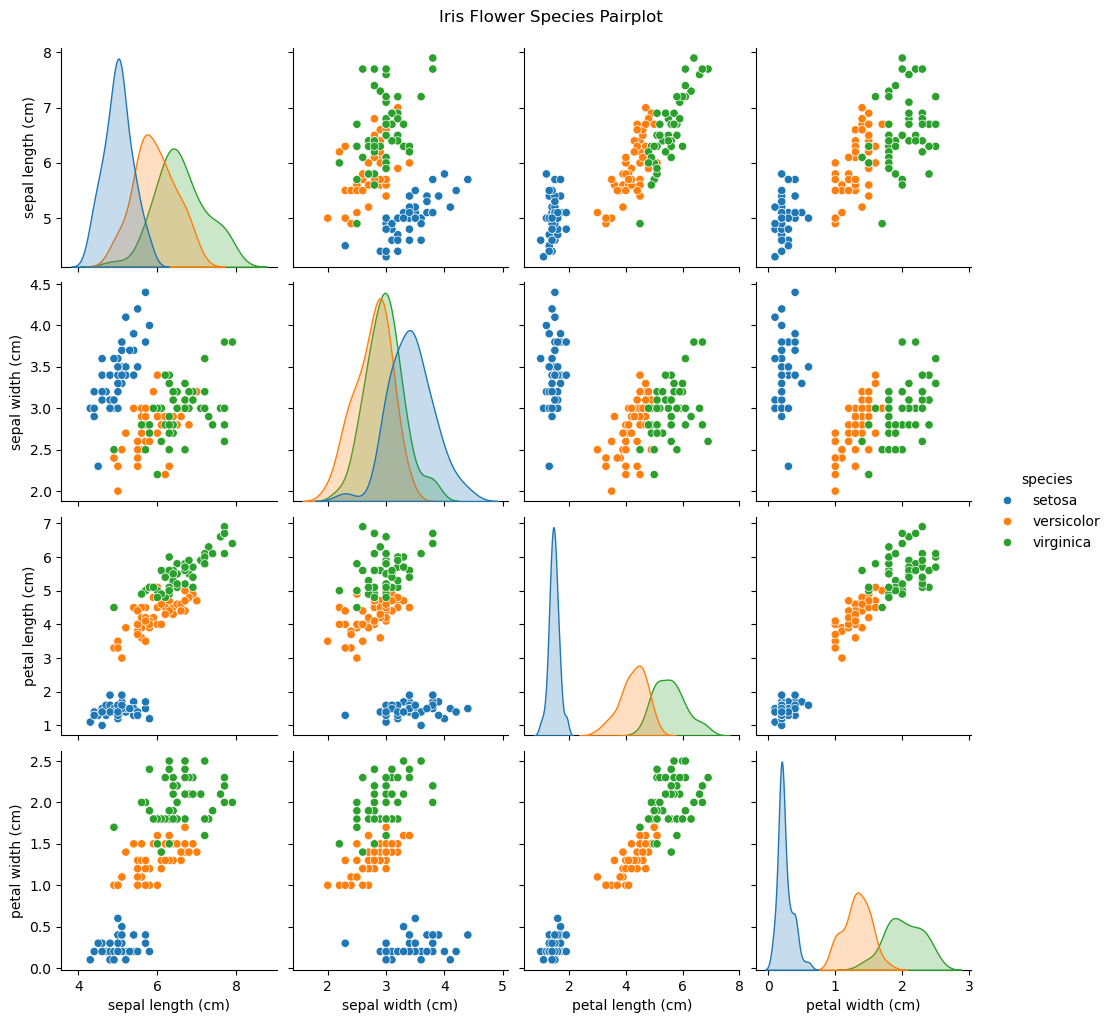

Accuracy: 100.00%
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Predicted species: setosa


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
iris = load_iris() 
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'}) 
print(df.head())

sns.pairplot(df, hue='species')
plt.suptitle('Iris Flower Species Pairplot', y=1.02)
plt.show()
X = iris.data 
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed report
print(classification_report(Y_test, y_pred, target_names=iris.target_names))

sample = [[5.1, 3.5, 1.6, 0.2]]  # Measurements of a new flower
prediction = model.predict(sample)
print("Predicted species:", iris.target_names[prediction[0]])